In [18]:
# Necessary libraries
!pip install autogluon -q

In [2]:
!pip install wandb -q

In [17]:
import wandb
wandb.login()
# You will have to provide an API key for the graphs to be shown in wandb, for that you have to create an account on https://www.wandb.ai

True

In [4]:
import numpy as np
import tensorflow as tf
import wandb
from wandb.integration.keras import WandbMetricsLogger, WandbModelCheckpoint
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Weights & Biases
wandb.init(project="mlp-iris", name="mlp-experiment")

# Load Iris Dataset
data = load_iris()
X = data.data
y = data.target.reshape(-1, 1)

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)  # 10% validation, 20% test

# Normalize features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


# Define the MLP Model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with updated W&B callbacks
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=500, batch_size=32,
                    callbacks=[WandbMetricsLogger()])

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
report = classification_report(y_test_classes, y_pred_classes, output_dict=True)
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Log results to W&B
wandb.log({
    "accuracy": accuracy,
    "precision": report['macro avg']['precision'],
    "recall": report['macro avg']['recall'],
    "f1-score": report['macro avg']['f1-score']
})

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
wandb.log({"confusion_matrix": wandb.Image(plt)})
plt.close()

# Training vs Validation Loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
wandb.log({"loss_curve": wandb.Image(plt)})
plt.close()

# Upload Confusion Matrix and Loss Curve to W&B
wandb.log({"confusion_matrix": wandb.Image(plt)})
wandb.log({"loss_curve": wandb.Image(plt)})

wandb.finish()


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.2279 - loss: 1.0950 - val_accuracy: 0.3333 - val_loss: 1.0873
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3493 - loss: 1.0814 - val_accuracy: 0.3333 - val_loss: 1.0757
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3562 - loss: 1.0727 - val_accuracy: 0.4000 - val_loss: 1.0640
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3774 - loss: 1.0609 - val_accuracy: 0.4000 - val_loss: 1.0527
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.3191 - loss: 1.0556 - val_accuracy: 0.4000 - val_loss: 1.0416
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.3635 - loss: 1.0389 - val_accuracy: 0.4000 - val_loss: 1.0294
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.3448 - loss: 1.0330 - val_accuracy: 0.5333 - val_loss: 1.0175
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.4613 - loss: 1.0249 - val_accuracy: 0.7333 - val_l

accuracy,▁
epoch/accuracy,▁▄▄▄▄▅▅▅▅▅▅▆▆███████████████████████████
epoch/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇██
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▇▇▇▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁
epoch/val_accuracy,▁▃▃▃▃▃▃▃▃▃▃▃▃▃▃█████████████████████████
epoch/val_loss,█▅▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
f1-score,▁
precision,▁
recall,▁
accuracy,0.96667


<Figure size 640x480 with 0 Axes>

In [5]:
# !pip show autogluon

In [6]:
# !pip install --upgrade autogluon.tabular[all] -q

In [7]:
# !pip install --upgrade scikit-learn

No path specified. Models will be saved in: "AutogluonModels/ag-20250226_174924"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.83 GB / 12.67 GB (85.4%)
Disk Space Avail:   73.23 GB / 107.72 GB (68.0%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be f

Test Accuracy: 1.0000
Test F1-score: 1.0000


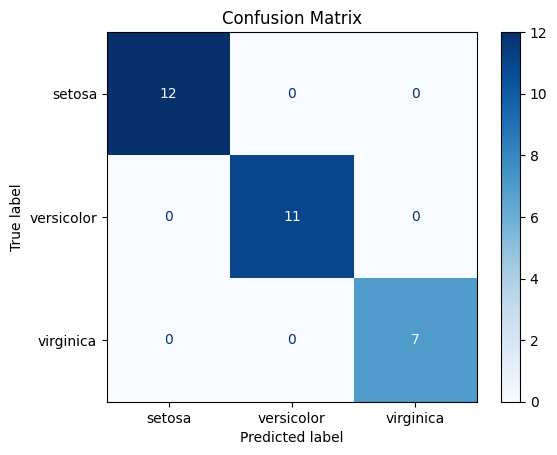

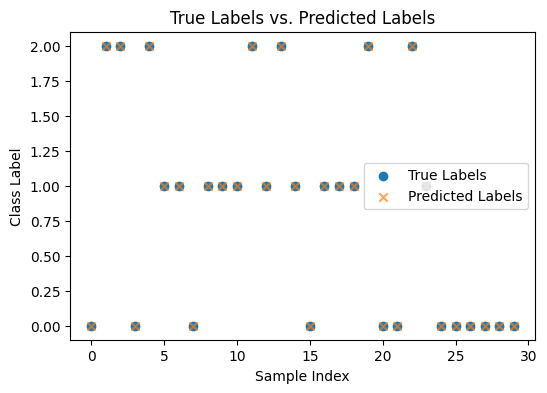

Sample Inputs, Predictions, and True Labels:
Input: [1.05882353 0.81818182 0.94642857 0.79166667], Predicted: virginica, True: virginica
Input: [0.32352941 0.86363636 0.03571429 0.125     ], Predicted: setosa, True: setosa
Input: [0.52941176 0.36363636 0.64285714 0.45833333], Predicted: versicolor, True: versicolor
Input: [0.73529412 0.54545455 0.85714286 0.91666667], Predicted: virginica, True: virginica
Input: [0.38235294 0.22727273 0.5        0.41666667], Predicted: versicolor, True: versicolor


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from autogluon.tabular import TabularPredictor
import pandas as pd
from sklearn.datasets import load_iris

# Load iris dataset and define species names
iris = load_iris()
species_names = iris.target_names.tolist()

# Convert data to pandas DataFrame for AutoGluon compatibility
feature_columns = iris.feature_names  # Use original iris feature names
X_train_df = pd.DataFrame(X_train, columns=feature_columns)
X_test_df = pd.DataFrame(X_test, columns=feature_columns)
y_train_df = pd.DataFrame(y_train.argmax(axis=1), columns=['species'])
y_test_df = pd.DataFrame(y_test.argmax(axis=1), columns=['species'])

# Map numerical labels to species names
y_train_df['species'] = y_train_df['species'].map(lambda x: species_names[x])
y_test_df['species'] = y_test_df['species'].map(lambda x: species_names[x])

# Combine features and labels
train_data = pd.concat([X_train_df, y_train_df], axis=1)
test_data = pd.concat([X_test_df, y_test_df], axis=1)

# Ensure label column is categorical
train_data['species'] = train_data['species'].astype('category')
test_data['species'] = test_data['species'].astype('category')

# Define hyperparameter grid
hyperparameters = {
    'NN_TORCH': {
        'num_epochs': 5,  # Max epochs, AutoGluon will tune within this
        'batch_size': 4,  # AutoGluon will optimize this
        'learning_rate': 1e-3  # AutoGluon will tune around this
    }
}

# Train AutoGluon model
predictor = TabularPredictor(label='species').fit(
    train_data,
    hyperparameters=hyperparameters,
    presets='best_quality',
    time_limit=600  # Set a reasonable training time limit
)

# Make predictions
predictions = predictor.predict(test_data.drop(columns=['species']))

# Compute evaluation metrics
accuracy = accuracy_score(test_data['species'], predictions)
f1 = f1_score(test_data['species'], predictions, average='weighted')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1-score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(test_data['species'], predictions, labels=species_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Plot true labels vs. predicted labels
plt.figure(figsize=(6,4))
plt.scatter(range(len(test_data)), test_data['species'].map(species_names.index), label='True Labels', marker='o')
plt.scatter(range(len(predictions)), predictions.map(species_names.index), label='Predicted Labels', marker='x', alpha=0.7)
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.legend()
plt.title("True Labels vs. Predicted Labels")
plt.show()

# Display five test samples
sample_indices = np.random.choice(len(X_test_df), 5, replace=False)
print("Sample Inputs, Predictions, and True Labels:")
for i in sample_indices:
    print(f"Input: {X_test_df.iloc[i].values}, Predicted: {predictions.iloc[i]}, True: {test_data.iloc[i]['species']}")